# Analysis of Salary Distribution and Wage Differences in Data Practitioner Roles

### Objective:

This analysis aims to examine the salary distribution across different positions and experience levels within the dataset of data practitioner roles. Additionally, the study investigates wage differences across various experience levels for the top five job titles: Data Analyst, Data Engineer, Data Scientist, Machine Learning Engineer, and Research Scientist.

### Source 

https://ai-jobs.net/salaries/download/

In [102]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
import numpy as np

# Load the data
url = "https://raw.githubusercontent.com/Benson90/Data-608/main/salaries.csv"
df = pd.read_csv(url)

### Descriptive Statistics :

I examined various aspects of the dataset's salary distribution across different positions and experience levels.

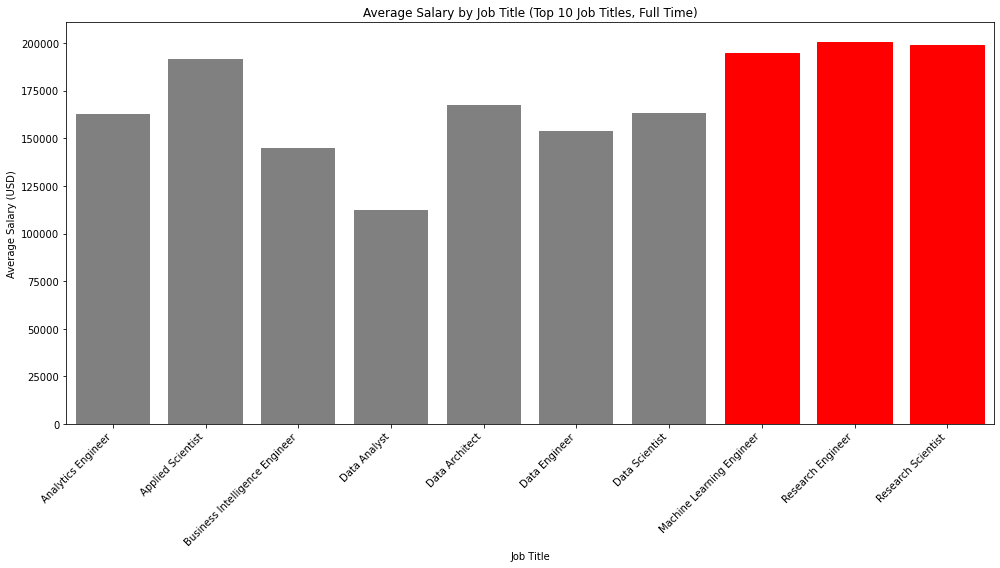

In [103]:
df_us = df[df['employee_residence'] == 'US']

df_filtered = df_us[(df_us['employment_type'] == 'FT')]

top_10_job_titles = df_filtered['job_title'].value_counts().head(10).index

df_filtered_top_10 = df_filtered[df_filtered['job_title'].isin(top_10_job_titles)]

avg_salary_by_role_state = df_filtered_top_10.groupby('job_title')['salary_in_usd'].mean().reset_index()

plt.figure(figsize=(14, 8))

base_color = 'grey'

sns.barplot(x='job_title', y='salary_in_usd', data=avg_salary_by_role_state, color=base_color)

highlight_colors = ['Research Engineer', 'Machine Learning Engineer', 'Research Scientist']
for i, title in enumerate(avg_salary_by_role_state['job_title']):
    if title in highlight_colors:
        plt.gca().get_children()[i].set_color('red')

plt.title('Average Salary by Job Title (Top 10 Job Titles, Full Time)')
plt.xlabel('Job Title')
plt.ylabel('Average Salary (USD)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


By calculating mean, Machine Learning Engineers, Research Engineers, and Research Scientists tend to have the highest average salaries among the top popular job titles. This suggests that roles requiring specialized skills or advanced expertise command higher compensation on average.

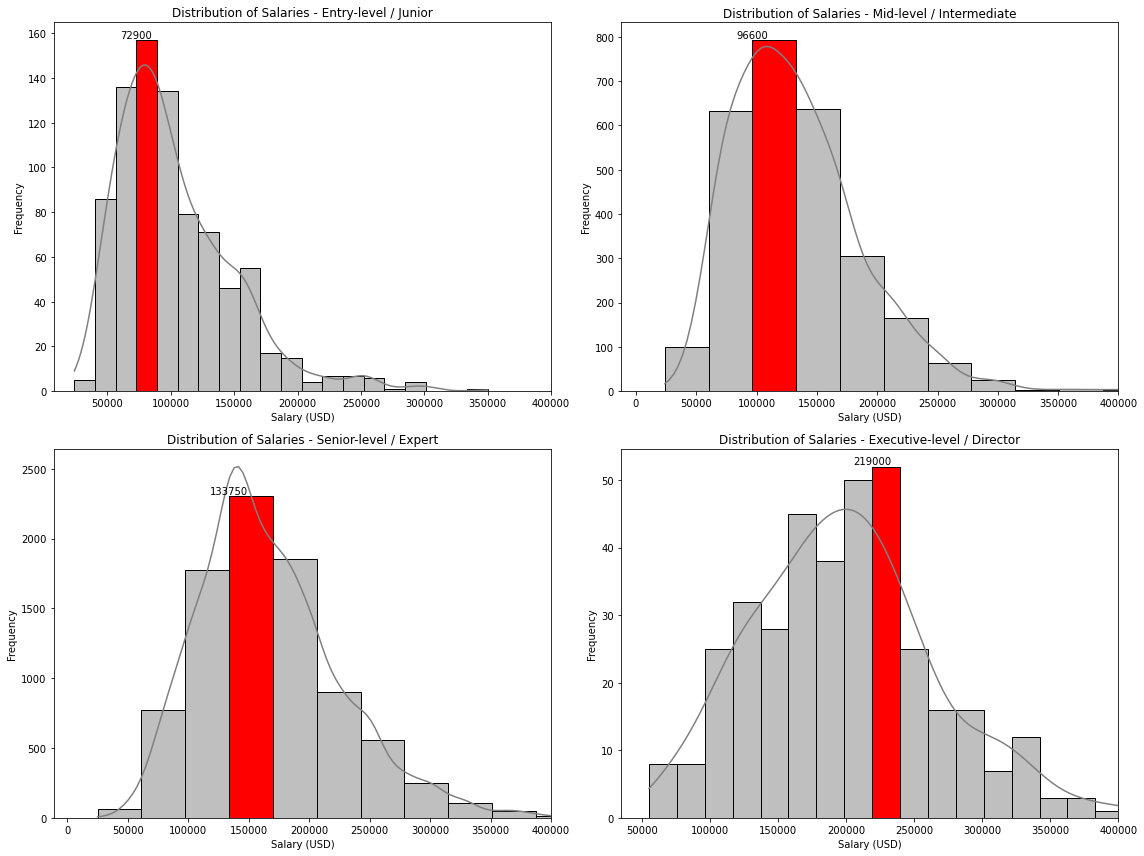

In [104]:


# Mapping for legend labels
legend_mapping = {
    'EN': 'Entry-level / Junior',
    'MI': 'Mid-level / Intermediate',
    'SE': 'Senior-level / Expert',
    'EX': 'Executive-level / Director'
}

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

axes = axes.flatten()

for i, level in enumerate(['EN', 'MI', 'SE', 'EX']):
    ax = axes[i]
    
    sns.histplot(df_us[df_us['experience_level'] == level]['salary_in_usd'], kde=True, ax=ax, bins=20, color='grey')
    
    data, bins, _ = ax.hist(df_us[df_us['experience_level'] == level]['salary_in_usd'], bins=20, alpha=0)
    
    max_bin = np.argmax(data)
    
    ax.patches[max_bin].set_facecolor('red')
    
    highlighted_salary = bins[max_bin]
    
    ax.text(highlighted_salary, data[max_bin], f'{highlighted_salary:.0f}', ha='center', va='bottom', color='black', fontsize=10)
    
    ax.set_title(f'Distribution of Salaries - {legend_mapping[level]}')
    ax.set_xlabel('Salary (USD)')
    ax.set_ylabel('Frequency')
    ax.set_xlim(right=400000)  

plt.tight_layout()
plt.show()

I explored the distribution of salaries across four different experience levels: Entry level, Mid-level, Senior level, and Executive level. 

As expected, The frequency distribution of salaries varies significantly across these experience levels. Entry-level positions exhibited the highest frequency at an average salary of $72,900, while Mid-level, Senior level, and Executive level positions had progressively higher average salaries and corresponding frequencies. 

This pattern suggests a general trend of increasing compensation with experience level, aligning with conventional job market expectations.

In [105]:
job_titles = ["Data Analyst", "Data Engineer", "Data Scientist", "Machine Learning Engineer", "Research Scientist"]
df_us_top5 = df[(df['employee_residence'] == 'US') & (df['job_title'].isin(job_titles))]
#print(df_us_top5.describe())

avg_wages = df_us_top5.groupby(['job_title', 'experience_level']).mean()['salary_in_usd']
#print(avg_wages)

/var/folders/wr/lm1p5z3s07x_rf77nv7d_zdr0000gn/T/ipykernel_7402/3746595887.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_top_10.sort_values('job_title', inplace=True)


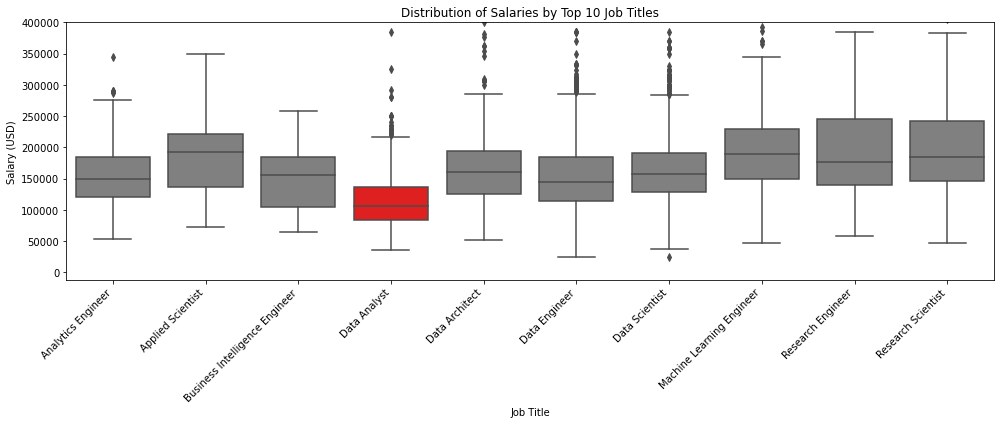

In [106]:
df_filtered_top_10.sort_values('job_title', inplace=True)

plt.figure(figsize=(14, 6))

my_colors = {title: 'red' if title == 'Data Analyst' else 'grey' for title in df_filtered_top_10['job_title'].unique()}

sns.boxplot(x='job_title', y='salary_in_usd', data=df_filtered_top_10, palette=my_colors)

plt.title('Distribution of Salaries by Top 10 Job Titles')
plt.xlabel('Job Title')
plt.ylabel('Salary (USD)')

plt.ylim(top=400000)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

When examining the distribution of salaries by Job Title, I discovered that Data Analysts have a relatively tighter salary range than other roles. This finding suggests there may be more consistency or standardization in the compensation structure for Data Analyst positions across different experience levels.

In [107]:
# Hypothesis testing

def perform_t_test(group1, group2):
    t_stat, p_value = ttest_ind(group1, group2)
    print(f"T-test between {group1.name} and {group2.name}:")
    print(f"  T-statistic: {t_stat}")
    print(f"  p-value: {p_value}")
    if p_value < 0.05:
        print("  Reject null hypothesis: There is a significant difference.")
    else:
        print("  Fail to reject null hypothesis: There is no significant difference.")

def perform_anova(groups):
    if len(groups) == 1:
        print("Only one group available for ANOVA.")
        return
    f_stat, p_value = f_oneway(*groups)
    print(f"ANOVA:")
    print(f"  F-statistic: {f_stat}")
    print(f"  p-value: {p_value}")
    if p_value < 0.05:
        print("  Reject null hypothesis: There is a significant difference.")
    else:
        print("  Fail to reject null hypothesis: There is no significant difference.")

print("\nHypothesis Testing:")
for job_title in df_us_top5['job_title'].unique():
    print(f"\nJob Title: {job_title}")
    groups = [df_us_top5[(df_us_top5['job_title'] == job_title) & (df_us_top5['experience_level'] == level)]['salary_in_usd'] for level in df_us[df_us['job_title'] == job_title]['experience_level'].unique()]
    if len(groups) == 2:
        perform_t_test(*groups)
    else:
        perform_anova(groups)


Hypothesis Testing:

Job Title: Data Analyst
ANOVA:
  F-statistic: 66.00419544711173
  p-value: 1.3990161852434188e-40
  Reject null hypothesis: There is a significant difference.

Job Title: Data Engineer
ANOVA:
  F-statistic: 99.87593210873288
  p-value: 2.2858415103244588e-61
  Reject null hypothesis: There is a significant difference.

Job Title: Data Scientist
ANOVA:
  F-statistic: 95.99930504958493
  p-value: 7.003426617201192e-59
  Reject null hypothesis: There is a significant difference.

Job Title: Machine Learning Engineer
ANOVA:
  F-statistic: 24.989973380868644
  p-value: 9.912025494048728e-16
  Reject null hypothesis: There is a significant difference.

Job Title: Research Scientist
ANOVA:
  F-statistic: 3.6924191970222275
  p-value: 0.011993251515007183
  Reject null hypothesis: There is a significant difference.


### Comparative Analysis:

/var/folders/wr/lm1p5z3s07x_rf77nv7d_zdr0000gn/T/ipykernel_7402/3295251853.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_us_top5['experience_level'] = pd.Categorical(df_us_top5['experience_level'], categories=experience_order, ordered=True)


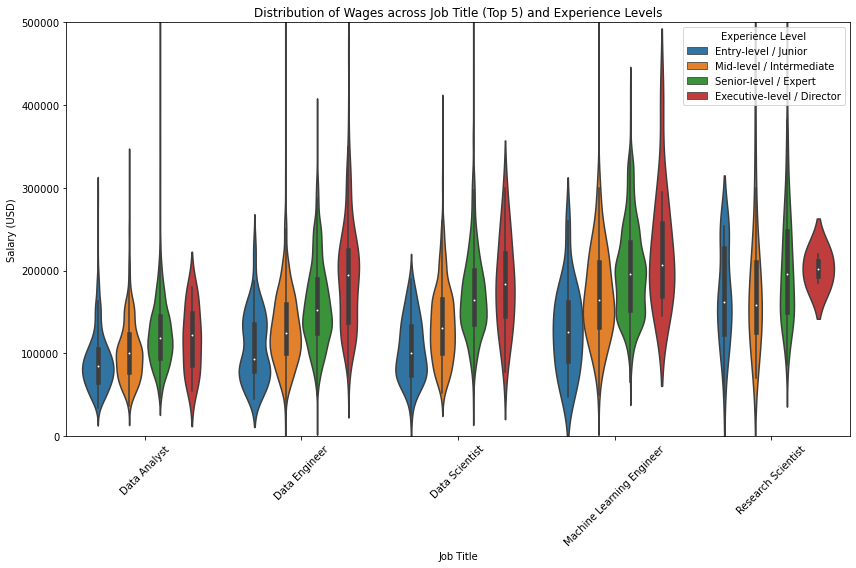

In [108]:
experience_order = ['EN', 'MI', 'SE', 'EX']

df_us_top5['experience_level'] = pd.Categorical(df_us_top5['experience_level'], categories=experience_order, ordered=True)

plt.figure(figsize=(12, 8))
sns.violinplot(x='job_title', y='salary_in_usd', hue='experience_level', data=df_us_top5)
plt.title('Distribution of Wages across Job Title (Top 5) and Experience Levels')
plt.xlabel('Job Title')
plt.ylabel('Salary (USD)')
plt.ylim(0, 500000)  
plt.xticks(rotation=45)

handles, labels = plt.gca().get_legend_handles_labels()
labels = [legend_mapping[label] if label in legend_mapping else label for label in labels]
plt.legend(handles, labels, title='Experience Level')

plt.tight_layout()
plt.show()


By expanding the wage differences, I investigated wage differences across various experience levels for the top five job titles: Data Analyst, Data Engineer, Data Scientist, Machine Learning Engineer, and Research Scientist.
The Distribution of Wages across Job Titles and Experience Levels chart shows a significant difference in wages across all experience levels for each job listed above. This indicates that experience level is crucial in determining the salary for data-related positions.

The chart continues to show that the Data Analyst job title exhibited the most minor salary disparity across different experience levels. This suggests that, compared to other positions, the Data Analyst role may have a more standardized compensation structure regardless of experience level.

### Conclusion:

Analyzing salary distribution and wage differences among data practitioner roles reveals compelling patterns. Descriptive statistics uncovered that Machine Learning Engineers, Research Engineers, and Research Scientists enjoy the highest average salaries, indicative of the premium on specialized skills. Moreover, the examination of salary distribution across experience levels demonstrated a consistent upward trend, with entry-level positions starting at \\$72,900 and senior executive roles reaching an average of \\$219,000. Interestingly, Data Analysts exhibited a narrower salary range than other roles, suggesting a more standardized compensation structure across different experience levels within this position.

These insights underscore the nuanced interplay between job title, experience level, and compensation within the data practitioner domain. Organizations can leverage this understanding to calibrate their remuneration strategies, ensuring competitive compensation packages while fostering fairness and equity across roles and experience levels.